Por favor, sube tu archivo .txt con los datos de TB3M y TB6M:


Saving Table 22.7.txt to Table 22.7 (8).txt
Advertencia: No se pudo convertir a float en la línea: obs	GS3M		GS6M

Primeras filas del dataset:
             GS3M   GS6M
Date                    
1982-01-01  12.92  13.90
1982-02-01  14.28  14.81
1982-03-01  13.31  13.83
1982-04-01  13.34  13.87
1982-05-01  12.71  13.13
1982-06-01  13.08  13.76
1982-07-01  11.86  12.80
1982-08-01   9.00  10.51
1982-09-01   8.19   9.83
1982-10-01   7.97   8.63

Número de filas: 234
NaN en el dataset: GS3M    0
GS6M    0
dtype: int64


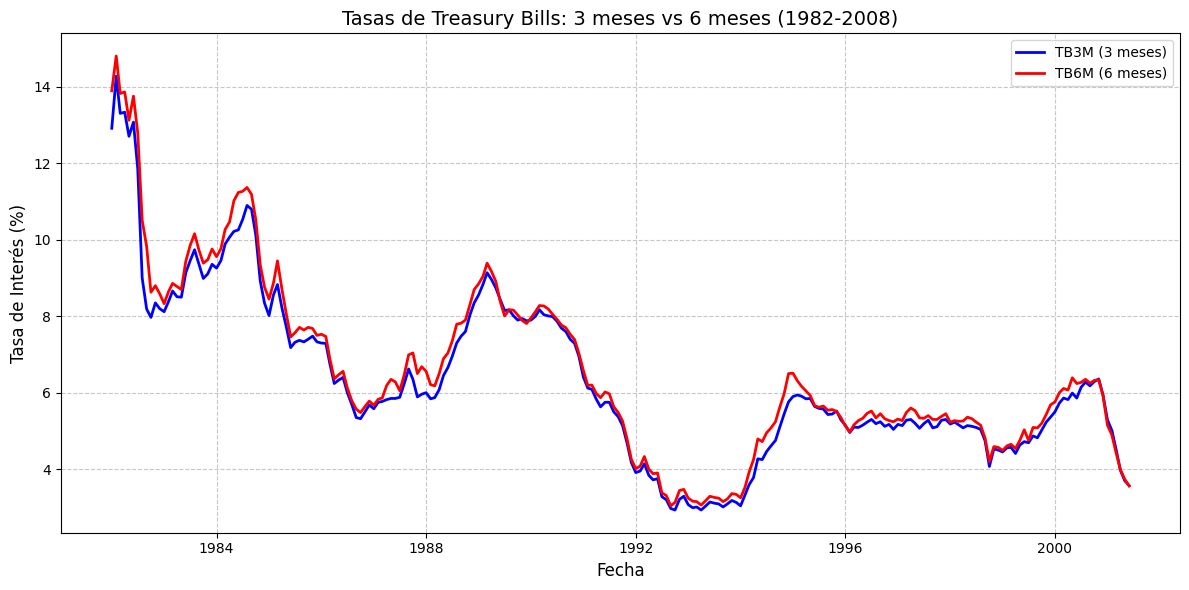


Punto a - Observación visual: Revisa si las series tienen tendencias similares, fluctuaciones conjuntas o divergen con el tiempo.

Pruebas de raíz unitaria para GS3M:
ADF Test:
Estadístico ADF: -1.5392
Valor p: 0.5140
Valores críticos: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
Interpretación:
  - No rechazamos H0: GS3M puede ser no estacionaria (I(1))

KPSS Test:
Estadístico KPSS: 1.4540
Valor p: 0.0100
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretación:
  - Rechazamos H0: GS3M es no estacionaria

Pruebas de raíz unitaria para GS3M (primeras diferencias):
ADF Test:
Estadístico ADF: -5.5734
Valor p: 0.0000
Valores críticos: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
Interpretación:
  - Rechazamos H0: GS3M (primeras diferencias) es estacionaria (I(0))

KPSS Test:
Estadístico KPSS: 0.1444
Valor p: 0.1000
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

<ipython-input-17-c4af0f28dd8c>:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')
<ipython-input-17-c4af0f28dd8c>:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')
<ipython-input-17-c4af0f28dd8c>:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Resumen del modelo VAR(4):
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Mar, 2025
Time:                     18:53:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.60086
Nobs:                     230.000    HQIC:                  -6.76139
Log likelihood:           155.330    FPE:                 0.00103864
AIC:                     -6.86993    Det(Omega_mle):     0.000961886
--------------------------------------------------------------------
Results for equation GS3M
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.174023         0.060143            2.893           0.004
L1.GS3M         1.774630         0.175928           10.087           0.000
L1.GS6M        -0.333347         0.170497           -1.95

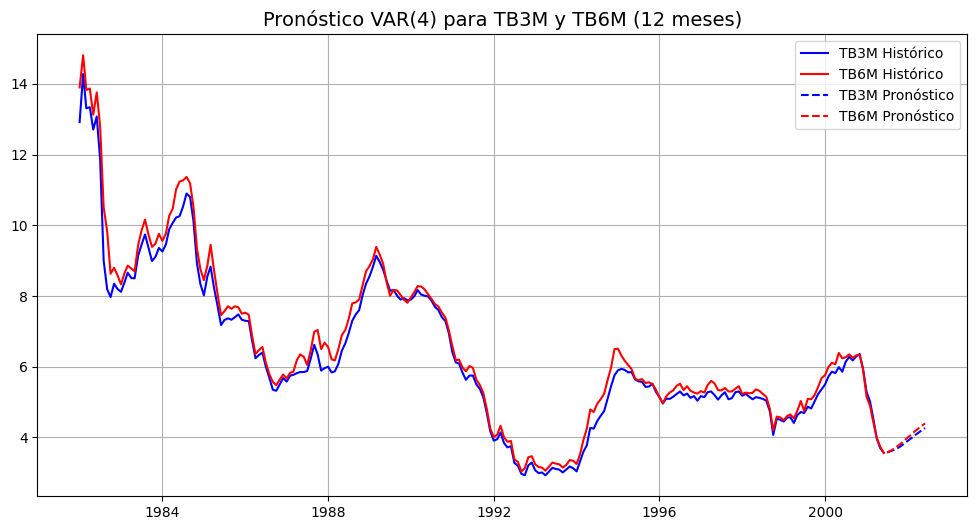

In [17]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Paso 1: Subir el archivo .txt
print("Por favor, sube tu archivo .txt con los datos de TB3M y TB6M:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Paso 2: Leer y parsear el archivo manualmente
with open(filename, 'r') as file:
    lines = file.readlines()

# Paso 3: Procesar los datos (3 columnas: obs, GS3M, GS6M)
dates = []
gs3m = []
gs6m = []

# Saltar las primeras 8 líneas y procesar desde la fila 9
for line in lines[8:]:  # Fila 9 tiene los encabezados, datos empiezan en fila 10
    if line.strip():  # Ignorar líneas vacías
        parts = line.split('\t')  # Separar por tabulaciones
        if len(parts) >= 3:  # Asegurarse de que haya al menos 3 columnas
            date = parts[0].strip().replace(':', '-') + '-01'  # Convertir '1982:01' a '1982-01-01'
            try:
                gs3m_value = float(parts[1].strip())
                gs6m_value = float(parts[2].strip())
                dates.append(date)
                gs3m.append(gs3m_value)
                gs6m.append(gs6m_value)
            except ValueError:
                print(f"Advertencia: No se pudo convertir a float en la línea: {line.strip()}")
                continue

# Crear DataFrame
df = pd.DataFrame({
    'Date': pd.to_datetime(dates),
    'GS3M': gs3m,
    'GS6M': gs6m
})
df.set_index('Date', inplace=True)

# Verificar datos cargados
print("\nPrimeras filas del dataset:")
print(df.head(10))
print("\nNúmero de filas:", len(df))
print("NaN en el dataset:", df.isnull().sum())

# Punto a: Graficar las dos series temporales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GS3M'], label='TB3M (3 meses)', color='blue', linewidth=2)
plt.plot(df.index, df['GS6M'], label='TB6M (6 meses)', color='red', linewidth=2)
plt.title('Tasas de Treasury Bills: 3 meses vs 6 meses (1982-2008)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tasa de Interés (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nPunto a - Observación visual: Revisa si las series tienen tendencias similares, "
      "fluctuaciones conjuntas o divergen con el tiempo.")

# Punto b: Análisis formal de raíz unitaria (ADF y KPSS)
def unit_root_tests(series, name):
    if series.dropna().empty or len(series.dropna()) < 2:
        print(f"\nNo hay datos válidos para {name}. No se pueden realizar pruebas.")
        return

    print(f"\nPruebas de raíz unitaria para {name}:")

    # ADF Test
    adf_result = adfuller(series.dropna(), autolag='AIC')
    print("ADF Test:")
    print(f'Estadístico ADF: {adf_result[0]:.4f}')
    print(f'Valor p: {adf_result[1]:.4f}')
    print(f'Valores críticos: {adf_result[4]}')
    print("Interpretación:")
    if adf_result[1] < 0.05:
        print(f"  - Rechazamos H0: {name} es estacionaria (I(0))")
    else:
        print(f"  - No rechazamos H0: {name} puede ser no estacionaria (I(1))")

    # KPSS Test
    try:
        kpss_result = kpss(series.dropna(), regression='c')
        print("\nKPSS Test:")
        print(f'Estadístico KPSS: {kpss_result[0]:.4f}')
        print(f'Valor p: {kpss_result[1]:.4f}')
        print(f'Valores críticos: {kpss_result[3]}')
        print("Interpretación:")
        if kpss_result[1] < 0.05:
            print(f"  - Rechazamos H0: {name} es no estacionaria")
        else:
            print(f"  - No rechazamos H0: {name} puede ser estacionaria")
    except Exception as e:
        print(f"Error en KPSS para {name}: {e}")

# Aplicar pruebas a niveles y diferencias
for col in ['GS3M', 'GS6M']:
    unit_root_tests(df[col], col)
    if adfuller(df[col].dropna())[1] >= 0.05:
        diff_series = df[col].diff().dropna()
        if not diff_series.empty:
            unit_root_tests(diff_series, f"{col} (primeras diferencias)")
        else:
            print(f"No hay suficientes datos para {col} después de diferenciar")

# Punto c: Prueba de cointegración
print("\nPunto c: Prueba de cointegración")
if (adfuller(df['GS3M'].dropna())[1] >= 0.05 and adfuller(df['GS6M'].dropna())[1] >= 0.05):
    # Engle-Granger
    coint_test = coint(df['GS3M'], df['GS6M'])
    print("\nPrueba Engle-Granger:")
    print(f'Estadístico: {coint_test[0]:.4f}')
    print(f'Valor p: {coint_test[1]:.4f}')
    print(f'Valores críticos: {coint_test[2]}')
    print("Interpretación:")
    if coint_test[1] < 0.05:
        print("  - Rechazamos H0: Las series están cointegradas")
    else:
        print("  - No rechazamos H0: Las series no están cointegradas")

    # Johansen (opcional, para robustez)
    johansen_test = coint_johansen(df[['GS3M', 'GS6M']], det_order=0, k_ar_diff=1)
    print("\nPrueba Johansen:")
    print(f"Estadísticos de traza: {johansen_test.lr1}")
    print(f'Valores críticos (95%): {johansen_test.cvt[:, 1]}')
    print("Interpretación:")
    for i, (stat, crit) in enumerate(zip(johansen_test.lr1, johansen_test.cvt[:, 1])):
        if stat > crit:
            print(f"  - r = {i}: Cointegración existe al 95%")
        else:
            print(f"  - r = {i}: No hay cointegración al 95%")
else:
    print("No se prueba cointegración porque al menos una serie es estacionaria")

# Punto d: Interpretación económica
print("\nPunto d: Interpretación económica")
print("Si están cointegradas: Existe una relación estable de largo plazo entre TB3M y TB6M, "
      "lo que sugiere que las tasas de corto y mediano plazo están vinculadas por expectativas "
      "del mercado o arbitraje.")
print("Si no están cointegradas: No hay una relación estable, lo que implica que las tasas "
      "pueden divergir, afectando predicciones o políticas basadas en su relación.")

# Punto e: Estimación de un modelo VAR(4)
print("\nPunto e: Estimación de un modelo VAR(4)")
stationary = (adfuller(df['GS3M'].dropna())[1] < 0.05 and adfuller(df['GS6M'].dropna())[1] < 0.05)
cointegrated = coint(df['GS3M'], df['GS6M'])[1] < 0.05 if not stationary else False

if stationary:
    print("Ambas series son estacionarias (I(0)). Usamos niveles.")
    model = VAR(df[['GS3M', 'GS6M']])
    results = model.fit(4)
elif cointegrated:
    print("Series no estacionarias pero cointegradas. Usamos niveles para VAR(4).")
    model = VAR(df[['GS3M', 'GS6M']])
    results = model.fit(4)
else:
    print("Series no estacionarias y no cointegradas (I(1)). Usamos primeras diferencias.")
    diff_data = df[['GS3M', 'GS6M']].diff().dropna()
    if len(diff_data) > 5:  # Asegurarse de tener suficientes datos (4 rezagos + 1)
        model = VAR(diff_data)
        results = model.fit(4)
    else:
        print("No hay suficientes datos después de diferenciar para ajustar un VAR(4)")
        results = None

# Mostrar resultados del VAR
if results is not None:
    print("\nResumen del modelo VAR(4):")
    print(results.summary())

    # Graficar predicciones
    forecast = results.forecast(results.endog, steps=12)
    forecast_index = pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:]
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['GS3M'], label='TB3M Histórico', color='blue')
    plt.plot(df.index, df['GS6M'], label='TB6M Histórico', color='red')
    plt.plot(forecast_index, forecast[:, 0], label='TB3M Pronóstico', color='blue', linestyle='--')
    plt.plot(forecast_index, forecast[:, 1], label='TB6M Pronóstico', color='red', linestyle='--')
    plt.title('Pronóstico VAR(4) para TB3M y TB6M (12 meses)', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()
else:
    print("No se pudo estimar el modelo VAR debido a datos insuficientes.")

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")